## Final Project


In [74]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

In [75]:
# open the dataset
bike = pd.read_csv('fordgobike.csv')

### 1. Data exploration

In [76]:
bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


In [77]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 59.5+ MB


#### Comment - 1: 
From the data as you can see starting time and eding time for bikes column data type need to be changed
- 'start_time and end_time' columns needs to be converted to datetime 
- member birthday is in float need to convert int 

In [78]:
bike.start_time = pd.to_datetime(bike.start_time)
bike.end_time = pd.to_datetime(bike.end_time)


In [83]:
bike.member_birth_year = bike.member_birth_year.astype('Int64')

In [86]:
bike.member_birth_year.head()

0    1987
1    1965
2     NaN
3     NaN
4    1997
Name: member_birth_year, dtype: Int64

In [84]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null datetime64[ns]
end_time                   519700 non-null datetime64[ns]
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_birth_year          453159 non-null Int64
member_gender              453238 non-null object
dtypes: Int64(1), datetime64[ns](2), float64(4), int64(4), object(4)
memory usage: 60.0+ MB


In [68]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 59.5+ MB


In [11]:
# check how the dataset variables are distributed and overall summary
bike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,453159.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079,1980.404787
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959,10.513488
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000,1886.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000,1974.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000,1983.000000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000,1988.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000,1999.000000


#### Comment -2
 - Average trip time for biker are around 1100 seconds, approximately 1100/60 = 18 minuts
 - Average trip minimum was around 1 min while maximum was approximately 86369/3600 = 24 hour
 
 
** Converting to second to min or hour:  1 min = 60 sec, 3600 sec = 1 hour

### Exploring with visualization

### 1. Trip duration for each people plot

Text(0.5, 0, 'Number of people')

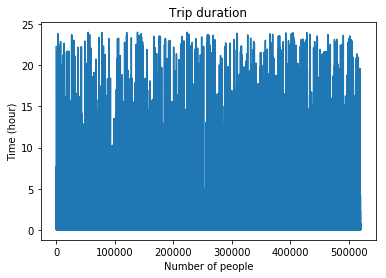

In [91]:
bike.duration_min = bike.duration_sec/60/60
plt.plot(bike.duration_min)
plt.title('Trip duration')
plt.ylabel('Time (hour)')
plt.xlabel('Number of people')

Text(0.5, 1.0, 'Subscirber vs Customer')

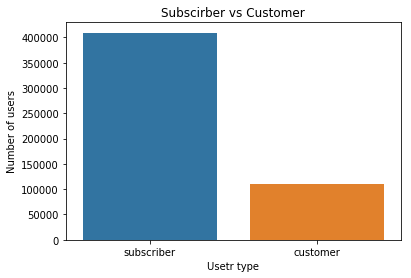

In [120]:
# the difference between subscribers and customer
user_count = np.array(bike.user_type.value_counts())
user_type = ['subscriber', "customer"]

ax = sb.barplot(x = user_type, y = user_count)

plt.xlabel('User type')
plt.ylabel('Number of users')
plt.title('Subscirber vs Customer')


### What birth year more commonly goes to trip?

In [193]:
a = bike.member_birth_year.value_counts().index.tolist()[:10]
b = list(bike.member_birth_year.value_counts()[:10])

Text(0.5, 1.0, 'Trips by birth year')

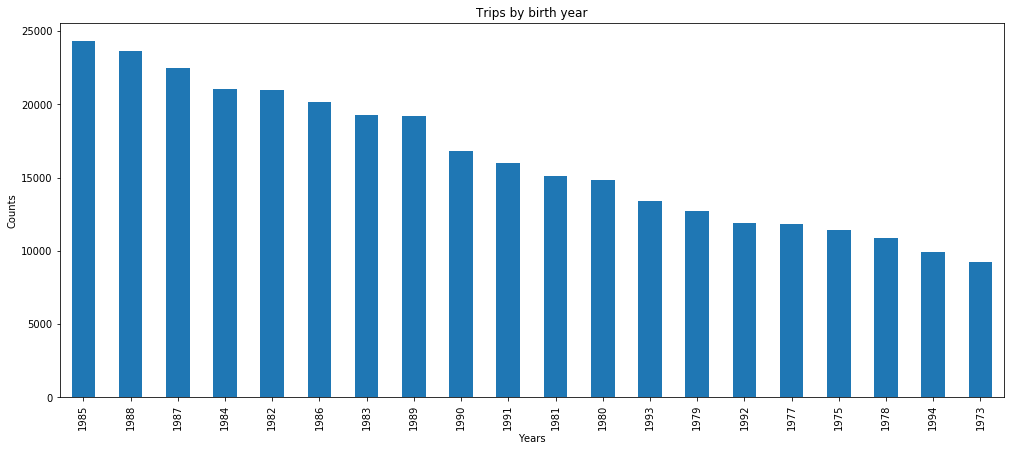

In [221]:
plt.figure(figsize=(14,6))
bike.member_birth_year.value_counts()[:20].plot(kind='bar')
plt.tight_layout()
plt.xlabel('Years')
plt.ylabel('Number of trips')
plt.title('Trips by birth year')

In [222]:
bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987,Male
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965,Female
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997,Female


In [234]:
bike.member_gender.value_counts()

Male      348318
Female     98621
Other       6299
Name: member_gender, dtype: int64

In [248]:
male_time = bike[bike['member_gender'] == 'Male']
female_time = bike[bike['member_gender'] == 'Female']

male_time

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987,Male
12,2183,2017-12-31 23:52:55.581,2018-01-01 00:29:18.743,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,24,Spear St at Folsom St,37.789677,-122.390428,2311,Subscriber,1990,Male
13,2170,2017-12-31 23:52:55.937,2018-01-01 00:29:06.924,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,24,Spear St at Folsom St,37.789677,-122.390428,3717,Subscriber,1990,Male
16,1474,2017-12-31 23:54:40.146,2018-01-01 00:19:14.351,14,Clay St at Battery St,37.795001,-122.399970,27,Beale St at Harrison St,37.788059,-122.391865,3646,Subscriber,1979,Male
19,1216,2017-12-31 23:46:33.993,2018-01-01 00:06:50.058,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,123,Folsom St at 19th St,37.760594,-122.414817,1473,Subscriber,1971,Male
20,386,2017-12-31 23:59:01.261,2018-01-01 00:05:27.809,317,San Salvador St at 9th St,37.333955,-121.877349,296,5th St at Virginia St,37.325998,-121.877120,1603,Subscriber,1992,Male
22,422,2017-12-31 23:54:25.337,2018-01-01 00:01:27.354,139,Garfield Square (25th St at Harrison St),37.751017,-122.411901,99,Folsom St at 15th St,37.767037,-122.415443,2415,Subscriber,1985,Male
28,871,2017-12-31 23:37:47.192,2017-12-31 23:52:18.473,323,Broadway at Kearny,37.798014,-122.405950,14,Clay St at Battery St,37.795001,-122.399970,1456,Subscriber,1979,Male
34,475,2017-12-31 23:37:35.545,2017-12-31 23:45:30.808,7,Frank H Ogawa Plaza,37.804562,-122.271738,230,14th St at Mandela Pkwy,37.810743,-122.291415,3598,Subscriber,1978,Male
35,152,2017-12-31 23:41:32.917,2017-12-31 23:44:05.047,96,Dolores St at 15th St,37.766210,-122.426614,86,Market St at Dolores St,37.769305,-122.426826,2728,Subscriber,1980,Male


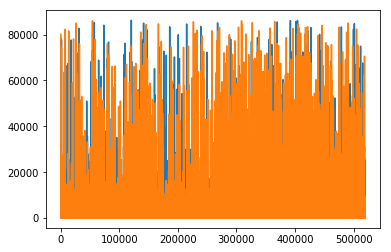

In [259]:
plt.plot(female_time['duration_sec'])
plt.plot(male_time['duration_sec'])

### Bivariate plot

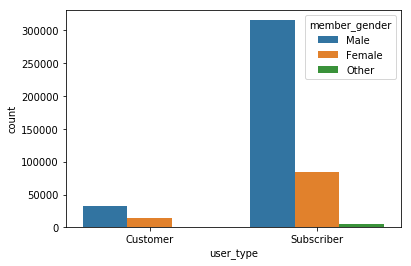

In [255]:
# plotting the user type with gender type of the members
sb.countplot(data = bike, x = 'user_type', hue = 'member_gender')

In [264]:
bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,gender_diff
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987,Male,0.0
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965,Female,NaN
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN,NaN
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN,NaN
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997,Female,NaN


In [242]:
bike.loc[bike.groupby('user_type')['duration_sec'].idxmin()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
65819,61,2017-12-06 21:18:33.941,2017-12-06 21:19:35.094,129,Harrison St at 20th St,37.758862,-122.412544,129,Harrison St at 20th St,37.758862,-122.412544,2121,Customer,1984,Male
8162,61,2017-12-27 08:40:13.217,2017-12-27 08:41:14.973,7,Frank H Ogawa Plaza,37.804562,-122.271738,7,Frank H Ogawa Plaza,37.804562,-122.271738,1261,Subscriber,1977,Male


In [59]:
df = bike.sort_values(by='duration_sec')
k = df['duration_sec'].drop_duplicates()


In [4]:
bike.user_type.value_counts()

Subscriber    409230
Customer      110470
Name: user_type, dtype: int64